Notebook based on _Hands-On Graph Neural Networks Using Python_, by Maxime Labonne.

# Ch 2. Graph Theory for Graph Neural Networks

In [1]:
import string

import networkx as nx

## 2.1 Graphs

### 2.1.1 Build graph

In [2]:
def build_graph():
    graph = nx.Graph()
    graph.add_node('A', name='Alice', age=30)
    graph.add_node('B', name='Bob', age=25)
    graph.add_edges_from([
        ('A', 'B', {'weight': 4.7, 'label': 'friends'}),
        ('A', 'C', {'weight': 2.1, 'label': 'colleagues'}),
        ('B', 'D'),
        ('B', 'E'),
        ('C', 'F'),
        ('C', 'G')
    ])
    return graph

In [3]:
G = build_graph()

### 2.1.2 Visualize graph

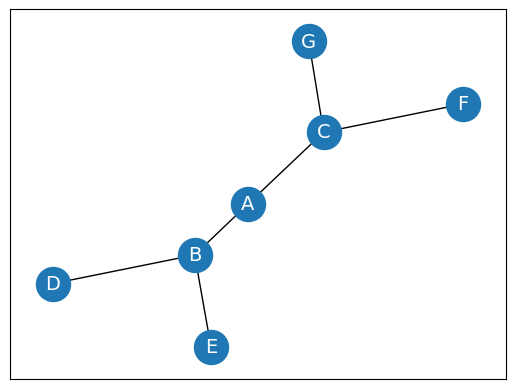

In [4]:
nx.draw_networkx(
    G,
    pos=nx.spring_layout(G, seed=0),
    node_size=600,
    font_size=14,
    font_color='white'
)

### 2.1.3 Query graph

In [5]:
G.nodes

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G'))

In [6]:
G.nodes['A']

{'name': 'Alice', 'age': 30}

In [7]:
G.edges

EdgeView([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

In [8]:
G.edges[('A', 'B')]

{'weight': 4.7, 'label': 'friends'}

In [9]:
G.edges[('A', 'C')]['label']

'colleagues'

### 2.1.2 Display graph stats

In [10]:
def display_graph_stats(graph):
    print(graph)
    print(f"degree: {graph.degree}")
    print(f"degree centrality: {nx.degree_centrality(graph)}")
    print(f"closeness centrality: {nx.closeness_centrality(graph)}")
    print(f"betweenness centrality: {nx.betweenness_centrality(graph)}")
    print(f"eigenvector centrality: {nx.eigenvector_centrality(graph)}")
    print(f"clustering coefficient: {nx.clustering(graph)}")
    print(f"clustering coefficient (A): {nx.clustering(graph, 'A')}")
    print(f"clustering coefficient (A, B): {nx.clustering(graph, ('A', 'B'))}")

In [11]:
display_graph_stats(G)

Graph with 7 nodes and 6 edges
degree: [('A', 2), ('B', 3), ('C', 3), ('D', 1), ('E', 1), ('F', 1), ('G', 1)]
degree centrality: {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
closeness centrality: {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
betweenness centrality: {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}
eigenvector centrality: {'A': 0.49999981183225145, 'B': 0.49999981183225145, 'C': 0.49999981183225145, 'D': 0.25000028225141036, 'E': 0.25000028225141036, 'F': 0.25000028225141036, 'G': 0.25000028225141036}
clustering coefficient: {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0}
clustering coefficient (A): 0
clustering coefficient (A, B): {'A': 0, 'B': 0}


### 2.1.5 Search algorithms

In [12]:
def bfs(graph, node):
    visited, queue = {node}, [node]
    while queue:
        m = queue.pop(0)
        print(m, end=" ")
        for neighbor in graph[m]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    return visited


def dfs(graph, node):
    def _dfs(graph, node, visited):
        visited.add(node)
        print(node, end=" ")
        for neighbor in graph[node]:
            if neighbor not in visited:
                _dfs(graph, neighbor, visited)
        return visited
    
    return _dfs(graph, node, set())

In [13]:
bfs(G, 'A')

A B C D E F G 

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [14]:
dfs(G, 'A')

A B D E C F G 

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

## 2.2 Directed graphs (digraphs)

### 2.2.1 Build digraph

In [15]:
DG = nx.DiGraph()
DG.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('B', 'D'),
    ('B', 'E'), ('C', 'F'), ('C', 'G')
])

### 2.2.2 Display digraph stats

In [16]:
print(DG)
for node in string.ascii_uppercase[:7]:
    print(f"indegree({node}): {DG.in_degree[node]}, outdegree({node}): {DG.out_degree[node]}")

DiGraph with 7 nodes and 6 edges
indegree(A): 0, outdegree(A): 2
indegree(B): 1, outdegree(B): 2
indegree(C): 1, outdegree(C): 2
indegree(D): 1, outdegree(D): 0
indegree(E): 1, outdegree(E): 0
indegree(F): 1, outdegree(F): 0
indegree(G): 1, outdegree(G): 0


### 2.2.3 Visualize digraph

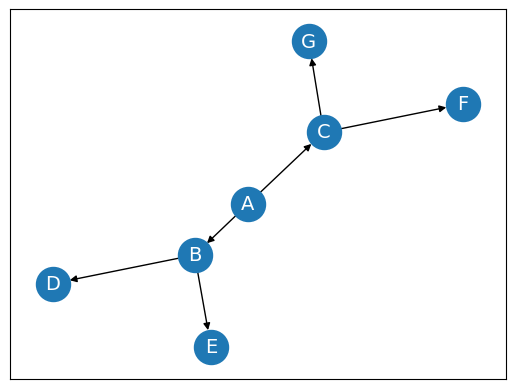

In [17]:
nx.draw_networkx(
    DG,
    pos=nx.spring_layout(G, seed=0),
    node_size=600,
    font_size=14,
    font_color='white'
)

## 2.3 Further reading

- [NetworkX](https://networkx.org/)